# Speech enhancement

**Objectives:**

* Applying low-pass, high-pass and band-pass filters for removing noise from speech signals
* Enhancing speech quality using spectral subtraction
* Practising scipy.signal package

## 1. Filtering

In this section, we will practise low-pass, high-pass, and band-pass filters. The dataset includes clean speech clips (in CleanSignals), noisy speech clips (in NoisySignals) and noise clips that contain only noise (in Noise). The dataset also include different types of noise, e.g., background noise from train stations, babble noise. The clean and noisy audio clips are from the NOIZEUS dataset. The noise clips are from the MS-SNSD.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

from pydub import AudioSegment
from pydub.utils import mediainfo

noisy_speech = AudioSegment.from_wav('NoisySignal/Station/sp01_station_sn5.wav')
noisy_s = noisy_speech.get_array_of_samples() # samples x(t)
noisy_f = noisy_speech.frame_rate # sampling rate f 

### We can visualise the signal 'noisy_s' in time domain using the following code:

Text(0, 0.5, 'Amplitude')

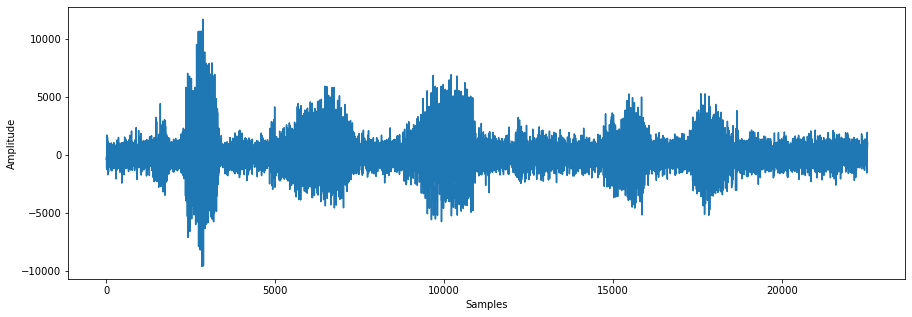

In [2]:
plt.figure(figsize = (15, 5))
plt.plot(noisy_s)
plt.xlabel('Samples')
plt.ylabel('Amplitude')

### Now, we examine the signal in noisy_s in frequency domain by plotting its spectrogram using the Fourier transform:

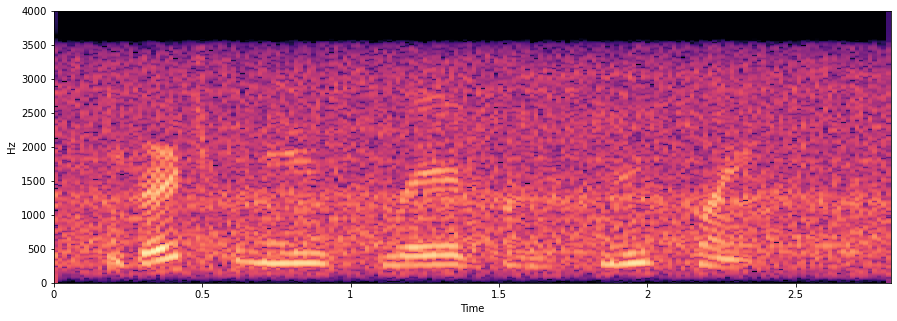

In [3]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 2048

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(noisy_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'

noisy_S = librosa.stft(np.float32(noisy_s),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
noisy_Sdb = librosa.amplitude_to_db(abs(noisy_S))
librosa.display.specshow(
    #spectrogram
    noisy_Sdb,
    
    #sampling rate
    sr = noisy_f,
    
    #label for horizontal axis
    x_axis = 'time',
    
    #presentation scale
    y_axis = 'linear',
    
    #hop_lenght
    hop_length = hop_length)

plt.savefig('noisy_s_spectogram.png')

**Suppose that we want to remove frequencies higher than 1000Hz from noisy_s. We define a cut-off frequency cutoff_freq = 1000 and construct a Butterworth (low-pass) filter with this cut-off frequency as follows:**

In [4]:
from scipy import signal

#order
order = 10

#sampling frequency
sampling_freq = noisy_f

#cut-off frequency. This can be an array if band-pass filter is used
#this must be within 0 and cutoff_freq/2
cutoff_freq = 1000

#filter type, e.g., 'lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
filter_type = 'lowpass'

#filter
h = signal.butter(N = order,
                  fs = sampling_freq,
                  Wn = cutoff_freq,
                  btype = filter_type,
                  analog = False,
                  output = 'sos')

### Now, we apply the filter h to noisy signal 'noisy_s' as follows:

In [5]:
filtered_s = signal.sosfilt(h, noisy_s)

### 'filtered_s' is the filtering result of noisy_s. You will need to save 'filtered_s' to file and auditorily evaluate its quality.

In [6]:
import array
import pydub
from pydub import AudioSegment

filtered_s_audio = pydub.AudioSegment(
    #raw data
    data = array.array(noisy_speech.array_type, np.float16(filtered_s)),
    
    #2 bytes = 16 bit samples
    sample_width = 2,
    
    #frame rate
    frame_rate = noisy_f,
    
    #channels = 1 for mono and 2 for stereo
    channels = 1)

filtered_s_audio.export('sp01_station_sn5_lowpass.wav', format = 'wav')

<_io.BufferedRandom name='sp01_station_sn5_lowpass.wav'>

### To visualise the effect of the filter 'h', we show the spectrogram of 'filtered_s':

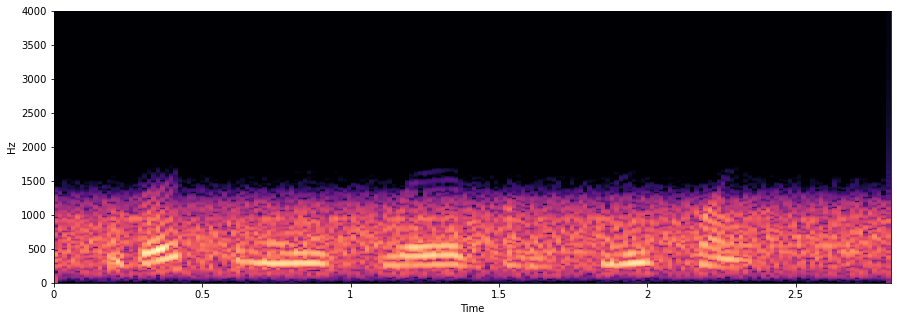

In [7]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 2048

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(noisy_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'

filtered_S = librosa.stft(np.float32(filtered_s),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
filtered_Sdb = librosa.amplitude_to_db(abs(filtered_S))
librosa.display.specshow(
    #spectrogram
    filtered_Sdb,
    
    #sampling rate
    sr = noisy_f,
    
    #label for horizontal axis
    x_axis = 'time',
    
    #presentation scale
    y_axis = 'linear',
    
    #hop_lenght
    hop_length = hop_length)

plt.savefig('filtered_lowpass_spectogram.png')

### Implement a high-pass filter with a cut-off frequency = 200Hz using Butterworth filter:

In [8]:
#order
order = 10

#sampling frequency
sampling_freq = noisy_f

#cut-off frequency. This can be an array if band-pass filter is used
#this must be within 0 and cutoff_freq/2
cutoff_freq = 200

#filter type, e.g., 'lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
filter_type = 'highpass'

#filter
hhp = signal.butter(N = order,
                  fs = sampling_freq,
                  Wn = cutoff_freq,
                  btype = filter_type,
                  analog = False,
                  output = 'sos')

In [9]:
filtered_shp = signal.sosfilt(hhp, noisy_s)

In [10]:
filtered_shp_audio = pydub.AudioSegment(
    #raw data
    data = array.array(noisy_speech.array_type, np.float16(filtered_shp)),
    
    #2 bytes = 16 bit samples
    sample_width = 2,
    
    #frame rate
    frame_rate = noisy_f,
    
    #channels = 1 for mono and 2 for stereo
    channels = 1)

filtered_shp_audio.export('sp01_station_sn5_highpass.wav', format = 'wav')

<_io.BufferedRandom name='sp01_station_sn5_highpass.wav'>

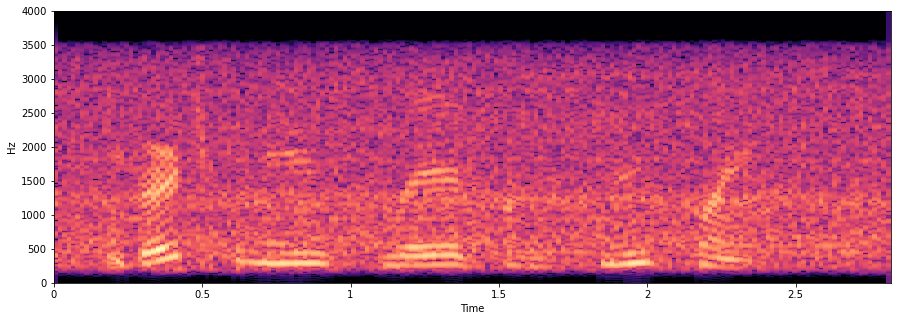

In [11]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 2048

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(noisy_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'

filtered_Shp = librosa.stft(np.float32(filtered_shp),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
filtered_Shpdb = librosa.amplitude_to_db(abs(filtered_Shp))
librosa.display.specshow(
    #spectrogram
    filtered_Shpdb,
    
    #sampling rate
    sr = noisy_f,
    
    #label for horizontal axis
    x_axis = 'time',
    
    #presentation scale
    y_axis = 'linear',
    
    #hop_lenght
    hop_length = hop_length)

plt.savefig('filtered_highpass_spectogram.png')

### Implement a band-pass filter with a pass band = [200Hz, 1000Hz] using Butterworth filter:

In [12]:
#order
order = 10

#sampling frequency
sampling_freq = noisy_f

#cut-off frequency. This can be an array if band-pass filter is used
#this must be within 0 and cutoff_freq/2
cutoff_freq = [200, 1000]

#filter type, e.g., 'lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
filter_type = 'bandpass'

#filter
hbp = signal.butter(N = order,
                  fs = sampling_freq,
                  Wn = cutoff_freq,
                  btype = filter_type,
                  analog = False,
                  output = 'sos')

In [13]:
filtered_sbp = signal.sosfilt(hbp, noisy_s)

In [14]:
filtered_sbp_audio = pydub.AudioSegment(
    #raw data
    data = array.array(noisy_speech.array_type, np.float16(filtered_sbp)),
    
    #2 bytes = 16 bit samples
    sample_width = 2,
    
    #frame rate
    frame_rate = noisy_f,
    
    #channels = 1 for mono and 2 for stereo
    channels = 1)

filtered_sbp_audio.export('sp01_station_sn5_bandpass.wav', format = 'wav')

<_io.BufferedRandom name='sp01_station_sn5_bandpass.wav'>

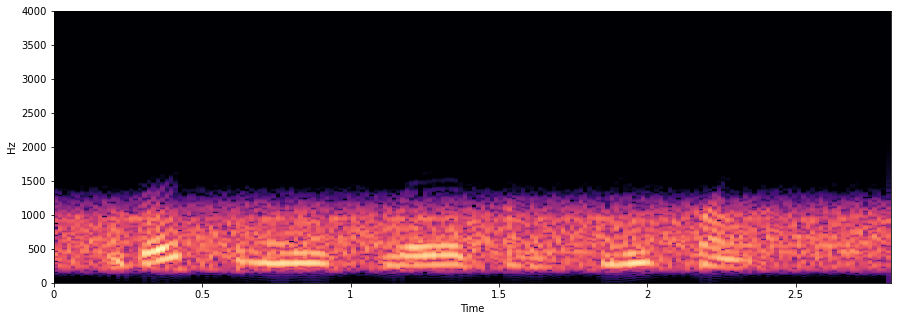

In [15]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 2048

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(noisy_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'

filtered_Sbp = librosa.stft(np.float32(filtered_sbp),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
filtered_Sbpdb = librosa.amplitude_to_db(abs(filtered_Sbp))
librosa.display.specshow(
    #spectrogram
    filtered_Sbpdb,
    
    #sampling rate
    sr = noisy_f,
    
    #label for horizontal axis
    x_axis = 'time',
    
    #presentation scale
    y_axis = 'linear',
    
    #hop_lenght
    hop_length = hop_length)

plt.savefig('filtered_bandpass_spectogram.png')

**We have done Low pass, High pass & band pass filtering to our noisy_s signal and observed the audio and spectograms of the filtered signals as above.**

## 2. Noise attenuation

In this section, we will apply the spectral subtraction for noise attenuation. We will use the noisy speech data in the NoisySignals folder and the noise signals (of different noise types) in the Noise folder. The noisy speech data is organised into different sub-folders corresponding to their noise types, e.g., background noise from train stations, babble noise. Clean signals are also provided for evaluation of the noise attenuation algorithms.

**Take the audio file sp01_station_sn5.wav in NoisySignal/Station as an example. Let y be the speech signal contained in sp01_station_sn5.wav, Y be the Fourier transforms of y, and mag_Y be the magnitude of Y (i.e., mag_Y = abs(Y)).**

In [16]:
# Read audio data from file
noisy_speech = AudioSegment.from_wav('NoisySignal/Station/sp01_station_sn5.wav')
y = noisy_speech.get_array_of_samples() # samples x(t)
y_f = noisy_speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(y_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

Y = librosa.stft(np.float32(y),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_Y = abs(Y)

**Similarly, let d be the noise signal contained in Noise/Station/Station_1.wav. Let D be the Fourier transforms of d, and mag_D be the magnitude of D. You are to implement d, D, and mag_D. Note: in this example, we are working on “station” noise. Therefore, Noise/Station/Station_1.wav is used. For other noise types, proper noise data should be used.**

In [17]:
# Read audio data from file
noise_speech = AudioSegment.from_wav('Noise/Station/Station_1.wav')
d = noise_speech.get_array_of_samples() # samples x(t)
d_f = noise_speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(d_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

D = librosa.stft(np.float32(y),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_D = abs(D)

In [18]:
mag_D.shape

(1025, 94)

In [19]:
mag_Y.shape

(1025, 188)

**Note that mag_D is an array whose rows represent frequencies and columns represent temporal frames. Next, we calculate the means for rows in mag_D, i.e., averaged-time frequencies**

In [20]:
means_mag_D = np.mean(mag_D, axis = 1)

In [21]:
means_mag_D

array([77.43214  , 77.888435 , 77.37555  , ...,  5.01974  ,  4.8604045,
        4.7474957], dtype=float32)

In [22]:
means_mag_D.shape

(1025,)

In [23]:
means_mag_D = means_mag_D.reshape(-1, 1)

In [24]:
means_mag_D.shape

(1025, 1)

In [25]:
H = np.sqrt(np.maximum(0, 1- (means_mag_D**2)/(mag_Y**2)))

In [26]:
S_hat = H*Y

In [27]:
S_hat

array([[-6.1533828e+03+0.00000000e+00j,  0.0000000e+00+0.00000000e+00j,
        -0.0000000e+00+0.00000000e+00j, ...,
        -0.0000000e+00+0.00000000e+00j,  0.0000000e+00+0.00000000e+00j,
         1.2564355e+03+0.00000000e+00j],
       [ 6.1594102e+03-1.03020464e-13j,  0.0000000e+00-0.00000000e+00j,
         0.0000000e+00+0.00000000e+00j, ...,
         0.0000000e+00-0.00000000e+00j, -0.0000000e+00+0.00000000e+00j,
        -1.2080349e+03+3.27192810e+02j],
       [-6.1773325e+03+1.74069309e-13j,  0.0000000e+00+0.00000000e+00j,
        -0.0000000e+00+0.00000000e+00j, ...,
         0.0000000e+00+0.00000000e+00j,  0.0000000e+00+0.00000000e+00j,
         1.0663979e+03-6.29746521e+02j],
       ...,
       [ 1.2706938e+02+8.76836364e-13j,  4.8709445e+00+2.46560514e-01j,
         0.0000000e+00+0.00000000e+00j, ...,
        -0.0000000e+00+0.00000000e+00j,  0.0000000e+00-0.00000000e+00j,
        -1.5444203e+02-9.27829056e+01j],
       [-1.2716137e+02+2.48508489e-14j, -5.2385240e+00-1.29122883e-0

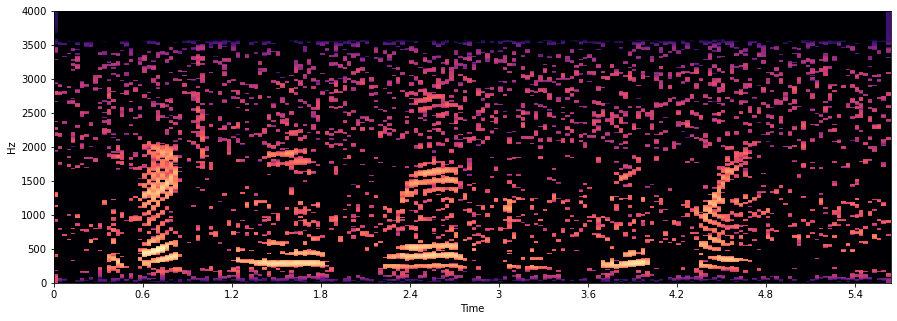

In [28]:
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
S_hatdb = librosa.amplitude_to_db(abs(S_hat))
librosa.display.specshow(
    #spectrogram
    S_hatdb,
    
    #sampling rate
    sr = y_f,
    
    #label for horizontal axis
    x_axis = 'time',
    
    #presentation scale
    y_axis = 'linear',
    
    #hop_length
    hop_length = hop_length)

plt.savefig('sp01_station_sn5_spectralsubtraction_S_hat_spectogram.png')

### Using librosa.istft to calculate s_hat (the inverse DFT of S_hat) as follows:

In [29]:
win_length = int(y_f * 0.03)

hop_length = int(win_length / 2)

s_hat = librosa.istft(S_hat, win_length=win_length, hop_length=hop_length, length=len(y))

In [30]:
s_hat.shape

(22529,)

**s_hat, computed using librosa.istft, may contain values out of the range of 16 bits. In order to store s_hat in a 16-bit wave file, you need to truncate the value of s_hat as follows:**

In [31]:
s_hat_truncated = np.float16(s_hat)
for i, num in enumerate(s_hat_truncated):
    if num > 32767:
        s_hat_truncated[i] = 32767
    elif num < -32768:
        s_hat_truncated[i] = -32768

In [32]:
filtered_shat_audio = pydub.AudioSegment(
    #raw data
    data = array.array('h', s_hat_truncated),
    
    #2 bytes = 16 bit samples
    sample_width = 2,
    
    #frame rate
    frame_rate = y_f,
    
    #channels = 1 for mono and 2 for stereo
    channels = 1)

filtered_shat_audio.export('sp01_station_sn5_spectralsubtraction.wav', format = 'wav')

<_io.BufferedRandom name='sp01_station_sn5_spectralsubtraction.wav'>

### Spectrogram of the clean signal in 'CleanSignal/sp01.wav' :

In [33]:
clean_speech = AudioSegment.from_wav('CleanSignal/sp01.wav') # Read audio data from file
c = clean_speech.get_array_of_samples() # samples x(t)
c_f = clean_speech.frame_rate # sampling rate f 

print('Sampling rate: ', c_f)
print('Number of samples: ', len(c))

Sampling rate:  8000
Number of samples:  22529


In [34]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 2048

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(c_f * 0.03)

#number of samples between tww consecutive frames
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'

#bydefault, hop_length = win_length / 4
C = librosa.stft(np.float32(c),
                 n_fft = freq_range,
                 window = window,
                 hop_length = hop_length,
                 win_length = win_length)

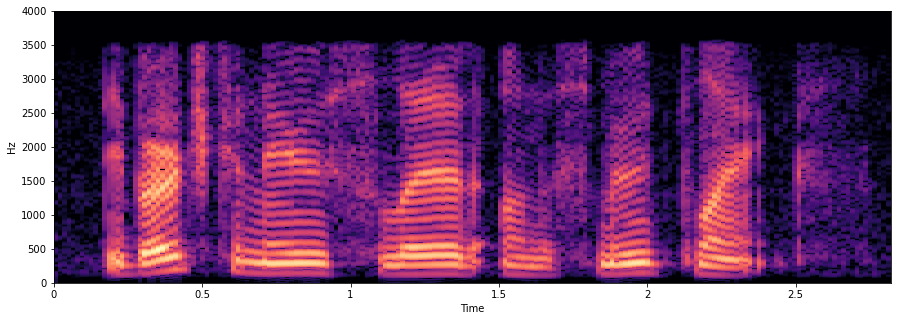

In [35]:
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
Cdb = librosa.amplitude_to_db(abs(C))
librosa.display.specshow(
    #spectrogram
    Cdb,
    
    #sampling rate
    sr = c_f,
    
    #label for horizontal axis
    x_axis = 'time',
    
    #presentation scale
    y_axis = 'linear',
    
    #hop_length
    hop_length = hop_length)

plt.savefig('cleansignal_spectogram.png')

**We have evaluated the attenuation in noise using spectral subtraction algorithm using noisy speech audio data and noise data from the 'Station' folder and found that in the attenuated signal using spectral subtraction algorithm, the noise is reduced by a good amount and we can hear more clearly than before. From the spectogram of Clean audio signal we can deduce that the clean audio contains very less noise and audio quality is also preserved, similar to our attenuated signal.**

### Test the spectral subtraction algorithm on the supplied speech signals in NoisySignal (sp02_station_sn5):

In [36]:
# Read audio data from file
noisy_speech_2 = AudioSegment.from_wav('NoisySignal/Station/sp02_station_sn5.wav')
z = noisy_speech_2.get_array_of_samples() # samples x(t)
z_f = noisy_speech_2.frame_rate # sampling rate f 

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(z_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

Z = librosa.stft(np.float32(z),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_Z = abs(Z)

In [37]:
# Read audio data from file
noise_speech_2 = AudioSegment.from_wav('Noise/Station/Station_1.wav')
k = noise_speech_2.get_array_of_samples() # samples x(t)
k_f = noise_speech_2.frame_rate # sampling rate f 

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(k_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

K = librosa.stft(np.float32(k),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_K = abs(K)

In [38]:
means_mag_K = np.mean(mag_K, axis = 1)

In [39]:
means_mag_K = means_mag_K.reshape(-1, 1)

In [40]:
H_2 = np.sqrt(np.maximum(0, 1- (means_mag_K**2)/(mag_Z**2)))

In [41]:
S_hat_2 = H_2*Z

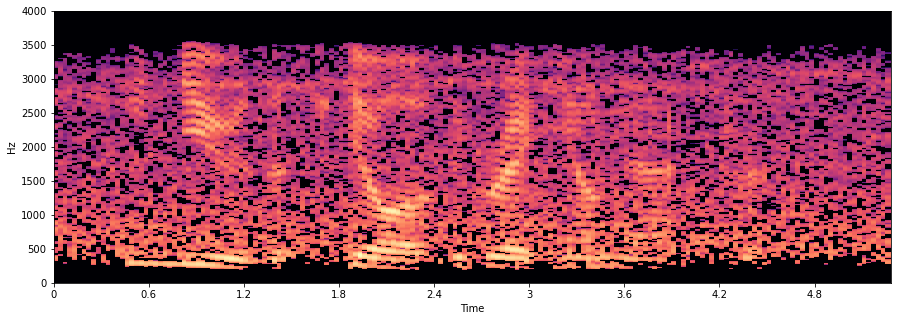

In [42]:
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
S_hat_2db = librosa.amplitude_to_db(abs(S_hat_2))
librosa.display.specshow(
    #spectrogram
    S_hat_2db,
    
    #sampling rate
    sr = z_f,
    
    #label for horizontal axis
    x_axis = 'time',
    
    #presentation scale
    y_axis = 'linear',
    
    #hop_length
    hop_length = hop_length)

plt.savefig('sp02_station_sn5_spectralsubtraction_S_hat_2spectogram.png')

In [43]:
win_length = int(z_f * 0.03)

hop_length = int(win_length / 2)

s_hat_2 = librosa.istft(S_hat_2, win_length=win_length, hop_length=hop_length, length=len(z))

In [44]:
s_hat_2_truncated = np.float16(s_hat_2)
for i, num in enumerate(s_hat_2_truncated):
    if num > 32767:
        s_hat_2_truncated[i] = 32767
    elif num < -32768:
        s_hat_2_truncated[i] = -32768

In [45]:
filtered_shat2_audio = pydub.AudioSegment(
    #raw data
    data = array.array('h', s_hat_2_truncated),
    
    #2 bytes = 16 bit samples
    sample_width = 2,
    
    #frame rate
    frame_rate = z_f,
    
    #channels = 1 for mono and 2 for stereo
    channels = 1)

filtered_shat2_audio.export('sp02_station_sn5_spectralsubtraction.wav', format = 'wav')

<_io.BufferedRandom name='sp02_station_sn5_spectralsubtraction.wav'>

### Test the spectral subtraction algorithm on the supplied speech signals in NoisySignal (sp01_babble_sn5):

In [46]:
# Read audio data from file
noisy_speech_3 = AudioSegment.from_wav('NoisySignal/Babble/sp01_babble_sn5.wav')
m = noisy_speech_3.get_array_of_samples() # samples x(t)
m_f = noisy_speech_3.frame_rate # sampling rate f 
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(m_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

M = librosa.stft(np.float32(m),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_M = abs(M)

In [47]:
# Read audio data from file
noise_speech_2 = AudioSegment.from_wav('Noise/Babble/Babble_1.wav')
n = noise_speech_2.get_array_of_samples() # samples x(t)
n_f = noise_speech_2.frame_rate # sampling rate f 

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(n_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

N = librosa.stft(np.float32(n),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_N = abs(N)

In [48]:
means_mag_N = np.mean(mag_N, axis = 1)

In [49]:
means_mag_N = means_mag_N.reshape(-1, 1)

In [50]:
H_3 = np.sqrt(np.maximum(0, 1- (means_mag_N**2)/(mag_M**2)))

In [51]:
S_hat_3 = H_3*M

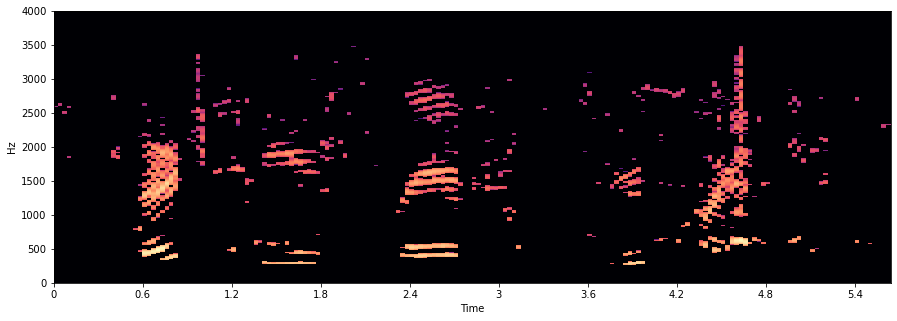

In [52]:
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
S_hat_3db = librosa.amplitude_to_db(abs(S_hat_3))
librosa.display.specshow(
    #spectrogram
    S_hat_3db,
    
    #sampling rate
    sr = m_f,
    
    #label for horizontal axis
    x_axis = 'time',
    
    #presentation scale
    y_axis = 'linear',
    
    #hop_length
    hop_length = hop_length)

plt.savefig('sp01_babble_sn5_spectralsubtraction_S_hat_3spectogram.png')

In [53]:
win_length = int(m_f * 0.03)

hop_length = int(win_length / 2)

s_hat_3 = librosa.istft(S_hat_3, win_length=win_length, hop_length=hop_length, length=len(m))

In [54]:
s_hat_3_truncated = np.float16(s_hat_3)
for i, num in enumerate(s_hat_3_truncated):
    if num > 32767:
        s_hat_3_truncated[i] = 32767
    elif num < -32768:
        s_hat_3_truncated[i] = -32768

In [55]:
filtered_shat3_audio = pydub.AudioSegment(
    #raw data
    data = array.array('h', s_hat_3_truncated),
    
    #2 bytes = 16 bit samples
    sample_width = 2,
    
    #frame rate
    frame_rate = m_f,
    
    #channels = 1 for mono and 2 for stereo
    channels = 1)

filtered_shat3_audio.export('sp01_babble_sn5_spectralsubtraction.wav', format = 'wav')

<_io.BufferedRandom name='sp01_babble_sn5_spectralsubtraction.wav'>

### Test the spectral subtraction algorithm on the supplied speech signals in NoisySignal (sp03_station_sn5):

In [67]:
# Read audio data from file
noisy_speech_4 = AudioSegment.from_wav('NoisySignal/Station/sp03_station_sn5.wav')
p = noisy_speech_4.get_array_of_samples() # samples x(t)
p_f = noisy_speech_4.frame_rate # sampling rate f 

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(p_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

P = librosa.stft(np.float32(p),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_P = abs(P)

In [68]:
# Read audio data from file
noise_speech_4 = AudioSegment.from_wav('Noise/Station/Station_1.wav')
q = noise_speech_4.get_array_of_samples() # samples x(t)
q_f = noise_speech_4.frame_rate # sampling rate f 

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(q_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

Q = librosa.stft(np.float32(q),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_Q = abs(Q)

In [69]:
means_mag_Q = np.mean(mag_Q, axis = 1)

In [70]:
means_mag_Q = means_mag_Q.reshape(-1, 1)

In [71]:
H_4 = np.sqrt(np.maximum(0, 1- (means_mag_Q**2)/(mag_P**2)))

In [72]:
S_hat_4 = H_4*P

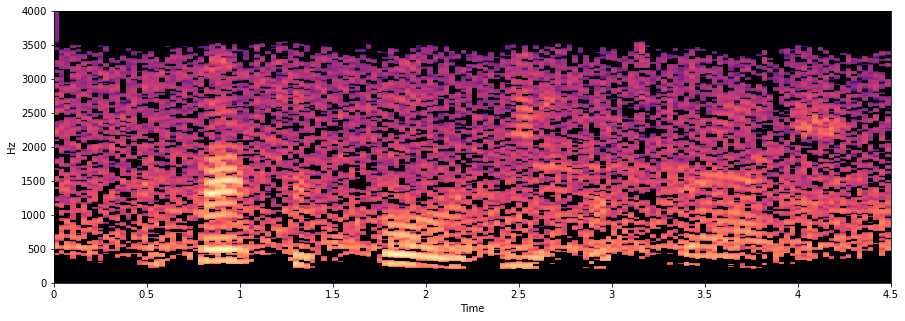

In [73]:
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
S_hat_4db = librosa.amplitude_to_db(abs(S_hat_4))
librosa.display.specshow(
    #spectrogram
    S_hat_4db,
    
    #sampling rate
    sr = p_f,
    
    #label for horizontal axis
    x_axis = 'time',
    
    #presentation scale
    y_axis = 'linear',
    
    #hop_length
    hop_length = hop_length)

plt.savefig('sp03_station_sn5_spectralsubtraction_S_hat_4spectogram.png')

In [74]:
win_length = int(p_f * 0.03)

hop_length = int(win_length / 2)

s_hat_4 = librosa.istft(S_hat_4, win_length=win_length, hop_length=hop_length, length=len(p))

In [75]:
s_hat_4_truncated = np.float16(s_hat_4)
for i, num in enumerate(s_hat_4_truncated):
    if num > 32767:
        s_hat_4_truncated[i] = 32767
    elif num < -32768:
        s_hat_4_truncated[i] = -32768

In [76]:
filtered_shat4_audio = pydub.AudioSegment(
    #raw data
    data = array.array('h', s_hat_4_truncated),
    
    #2 bytes = 16 bit samples
    sample_width = 2,
    
    #frame rate
    frame_rate = p_f,
    
    #channels = 1 for mono and 2 for stereo
    channels = 1)

filtered_shat4_audio.export('sp03_station_sn5_spectralsubtraction.wav', format = 'wav')

<_io.BufferedRandom name='sp03_station_sn5_spectralsubtraction.wav'>

### Test the spectral subtraction algorithm on the supplied speech signals in NoisySignal (sp04_station_sn5):

In [77]:
# Read audio data from file
noisy_speech_5 = AudioSegment.from_wav('NoisySignal/Station/sp04_station_sn5.wav')
r = noisy_speech_5.get_array_of_samples() # samples x(t)
r_f = noisy_speech_5.frame_rate # sampling rate f 

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(r_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

R = librosa.stft(np.float32(r),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_R = abs(R)

In [78]:
# Read audio data from file
noise_speech_5 = AudioSegment.from_wav('Noise/Station/Station_1.wav')
s = noise_speech_5.get_array_of_samples() # samples x(t)
s_f = noise_speech_5.frame_rate # sampling rate f 

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(s_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

S = librosa.stft(np.float32(s),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_S = abs(S)

In [79]:
means_mag_S = np.mean(mag_S, axis = 1)

In [80]:
means_mag_S = means_mag_S.reshape(-1, 1)

In [81]:
H_5 = np.sqrt(np.maximum(0, 1- (means_mag_S**2)/(mag_R**2)))

In [82]:
S_hat_5 = H_5*R

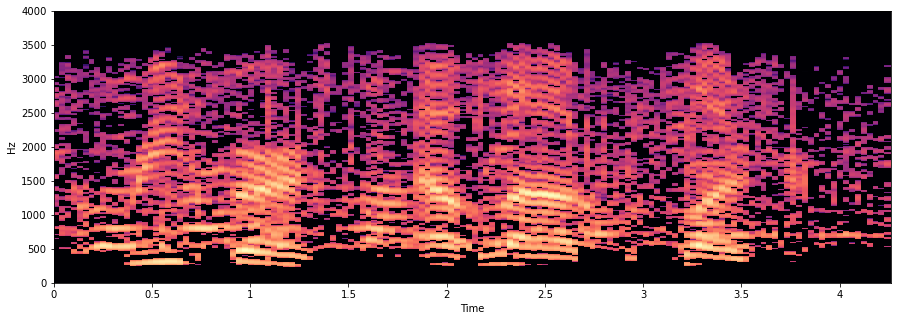

In [83]:
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
S_hat_5db = librosa.amplitude_to_db(abs(S_hat_5))
librosa.display.specshow(
    #spectrogram
    S_hat_5db,
    
    #sampling rate
    sr = r_f,
    
    #label for horizontal axis
    x_axis = 'time',
    
    #presentation scale
    y_axis = 'linear',
    
    #hop_length
    hop_length = hop_length)

plt.savefig('sp04_station_sn5_spectralsubtraction_S_hat_5spectogram.png')

In [84]:
win_length = int(r_f * 0.03)

hop_length = int(win_length / 2)

s_hat_5 = librosa.istft(S_hat_5, win_length=win_length, hop_length=hop_length, length=len(r))

In [85]:
s_hat_5_truncated = np.float16(s_hat_5)
for i, num in enumerate(s_hat_5_truncated):
    if num > 32767:
        s_hat_5_truncated[i] = 32767
    elif num < -32768:
        s_hat_5_truncated[i] = -32768

In [86]:
filtered_shat5_audio = pydub.AudioSegment(
    #raw data
    data = array.array('h', s_hat_5_truncated),
    
    #2 bytes = 16 bit samples
    sample_width = 2,
    
    #frame rate
    frame_rate = r_f,
    
    #channels = 1 for mono and 2 for stereo
    channels = 1)

filtered_shat5_audio.export('sp04_station_sn5_spectralsubtraction.wav', format = 'wav')

<_io.BufferedRandom name='sp04_station_sn5_spectralsubtraction.wav'>

### Test the spectral subtraction algorithm on the supplied speech signals in NoisySignal (sp02_babble_sn5):

In [87]:
# Read audio data from file
noisy_speech_6 = AudioSegment.from_wav('NoisySignal/Babble/sp02_babble_sn5.wav')
u = noisy_speech_6.get_array_of_samples() # samples x(t)
u_f = noisy_speech_6.frame_rate # sampling rate f 
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(u_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

U = librosa.stft(np.float32(u),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_U = abs(U)

In [88]:
# Read audio data from file
noise_speech_6 = AudioSegment.from_wav('Noise/Babble/Babble_1.wav')
v = noise_speech_6.get_array_of_samples() # samples x(t)
v_f = noise_speech_6.frame_rate # sampling rate f 

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(v_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

V = librosa.stft(np.float32(v),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_V = abs(V)

In [89]:
means_mag_V = np.mean(mag_V, axis = 1)

In [90]:
means_mag_V = means_mag_V.reshape(-1, 1)

In [91]:
H_6 = np.sqrt(np.maximum(0, 1- (means_mag_V**2)/(mag_U**2)))

In [92]:
S_hat_6 = H_6*U

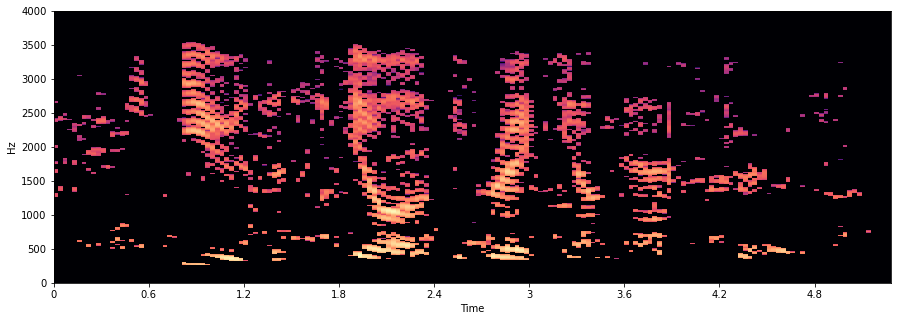

In [93]:
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
S_hat_6db = librosa.amplitude_to_db(abs(S_hat_6))
librosa.display.specshow(
    #spectrogram
    S_hat_6db,
    
    #sampling rate
    sr = u_f,
    
    #label for horizontal axis
    x_axis = 'time',
    
    #presentation scale
    y_axis = 'linear',
    
    #hop_length
    hop_length = hop_length)

plt.savefig('sp02_babble_sn5_spectralsubtraction_S_hat_6spectogram.png')

In [94]:
win_length = int(u_f * 0.03)

hop_length = int(win_length / 2)

s_hat_6 = librosa.istft(S_hat_6, win_length=win_length, hop_length=hop_length, length=len(u))

In [95]:
s_hat_6_truncated = np.float16(s_hat_6)
for i, num in enumerate(s_hat_6_truncated):
    if num > 32767:
        s_hat_6_truncated[i] = 32767
    elif num < -32768:
        s_hat_6_truncated[i] = -32768

In [96]:
filtered_shat6_audio = pydub.AudioSegment(
    #raw data
    data = array.array('h', s_hat_6_truncated),
    
    #2 bytes = 16 bit samples
    sample_width = 2,
    
    #frame rate
    frame_rate = u_f,
    
    #channels = 1 for mono and 2 for stereo
    channels = 1)

filtered_shat6_audio.export('sp02_babble_sn5_spectralsubtraction.wav', format = 'wav')

<_io.BufferedRandom name='sp02_babble_sn5_spectralsubtraction.wav'>

### Test the spectral subtraction algorithm on the supplied speech signals in NoisySignal (sp03_babble_sn5):

In [97]:
# Read audio data from file
noisy_speech_7 = AudioSegment.from_wav('NoisySignal/Babble/sp03_babble_sn5.wav')
a = noisy_speech_7.get_array_of_samples() # samples x(t)
a_f = noisy_speech_7.frame_rate # sampling rate f 
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(a_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

A = librosa.stft(np.float32(a),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_A = abs(A)

In [98]:
# Read audio data from file
noise_speech_7 = AudioSegment.from_wav('Noise/Babble/Babble_1.wav')
b = noise_speech_7.get_array_of_samples() # samples x(t)
b_f = noise_speech_7.frame_rate # sampling rate f 

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(b_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

B = librosa.stft(np.float32(b),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_B = abs(B)

In [99]:
means_mag_B = np.mean(mag_B, axis = 1)

In [100]:
means_mag_B = means_mag_B.reshape(-1, 1)

In [101]:
H_7 = np.sqrt(np.maximum(0, 1- (means_mag_B**2)/(mag_A**2)))

In [102]:
S_hat_7 = H_7*A

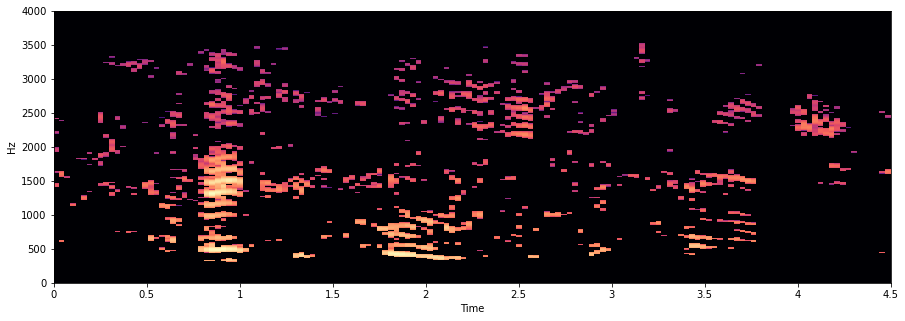

In [103]:
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
S_hat_7db = librosa.amplitude_to_db(abs(S_hat_7))
librosa.display.specshow(
    #spectrogram
    S_hat_7db,
    
    #sampling rate
    sr = a_f,
    
    #label for horizontal axis
    x_axis = 'time',
    
    #presentation scale
    y_axis = 'linear',
    
    #hop_length
    hop_length = hop_length)

plt.savefig('sp03_babble_sn5_spectralsubtraction_S_hat_7spectogram.png')

In [104]:
win_length = int(a_f * 0.03)

hop_length = int(win_length / 2)

s_hat_7 = librosa.istft(S_hat_7, win_length=win_length, hop_length=hop_length, length=len(a))

In [105]:
s_hat_7_truncated = np.float16(s_hat_7)
for i, num in enumerate(s_hat_7_truncated):
    if num > 32767:
        s_hat_7_truncated[i] = 32767
    elif num < -32768:
        s_hat_7_truncated[i] = -32768

In [106]:
filtered_shat7_audio = pydub.AudioSegment(
    #raw data
    data = array.array('h', s_hat_7_truncated),
    
    #2 bytes = 16 bit samples
    sample_width = 2,
    
    #frame rate
    frame_rate = a_f,
    
    #channels = 1 for mono and 2 for stereo
    channels = 1)

filtered_shat7_audio.export('sp03_babble_sn5_spectralsubtraction.wav', format = 'wav')

<_io.BufferedRandom name='sp03_babble_sn5_spectralsubtraction.wav'>

### Test the spectral subtraction algorithm on the supplied speech signals in NoisySignal (sp04_babble_sn5):

In [107]:
# Read audio data from file
noisy_speech_8 = AudioSegment.from_wav('NoisySignal/Babble/sp04_babble_sn5.wav')
l = noisy_speech_8.get_array_of_samples() # samples x(t)
l_f = noisy_speech_8.frame_rate # sampling rate f 
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(l_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

L = librosa.stft(np.float32(l),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_L = abs(L)

In [108]:
# Read audio data from file
noise_speech_8 = AudioSegment.from_wav('Noise/Babble/Babble_1.wav')
o = noise_speech_8.get_array_of_samples() # samples x(t)
o_f = noise_speech_8.frame_rate # sampling rate f 

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(o_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

O = librosa.stft(np.float32(o),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_O = abs(O)

In [109]:
means_mag_O = np.mean(mag_O, axis = 1)

In [110]:
means_mag_O = means_mag_O.reshape(-1, 1)

In [111]:
H_8 = np.sqrt(np.maximum(0, 1- (means_mag_O**2)/(mag_L**2)))

In [112]:
S_hat_8 = H_8*L

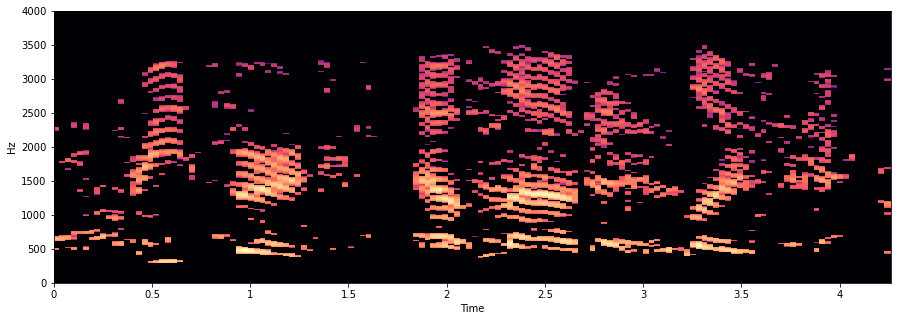

In [113]:
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
S_hat_8db = librosa.amplitude_to_db(abs(S_hat_8))
librosa.display.specshow(
    #spectrogram
    S_hat_8db,
    
    #sampling rate
    sr = l_f,
    
    #label for horizontal axis
    x_axis = 'time',
    
    #presentation scale
    y_axis = 'linear',
    
    #hop_length
    hop_length = hop_length)

plt.savefig('sp04_babble_sn5_spectralsubtraction_S_hat_8spectogram.png')

In [114]:
win_length = int(l_f * 0.03)

hop_length = int(win_length / 2)

s_hat_8 = librosa.istft(S_hat_8, win_length=win_length, hop_length=hop_length, length=len(l))

In [115]:
s_hat_8_truncated = np.float16(s_hat_8)
for i, num in enumerate(s_hat_8_truncated):
    if num > 32767:
        s_hat_8_truncated[i] = 32767
    elif num < -32768:
        s_hat_8_truncated[i] = -32768

In [116]:
filtered_shat8_audio = pydub.AudioSegment(
    #raw data
    data = array.array('h', s_hat_8_truncated),
    
    #2 bytes = 16 bit samples
    sample_width = 2,
    
    #frame rate
    frame_rate = l_f,
    
    #channels = 1 for mono and 2 for stereo
    channels = 1)

filtered_shat8_audio.export('sp04_babble_sn5_spectralsubtraction.wav', format = 'wav')

<_io.BufferedRandom name='sp04_babble_sn5_spectralsubtraction.wav'>

**After testing the spectral subtraction algorithm on the supplied speech signals in 'NoisySignal', we can deduce that it improves the audio by reducing the noise to a good strength and average signal-to-noise ratio (SNR) is improved. The longer noise section is used in analysis, the more accurate the noise estimate is. We can see how good the algorithm is in resotring the audio quality by reducing the noise in 'sp01_babble_sn5.wav' by evaluating the spectral subtraction spectogram of the signal.** 

